##Using Different Types of Bagging Using Iris Dataset



# IMPORTING THE LIBRARIES

IMPORTING THE DATA SCIENCE LIBRARIES**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

**IMPORTING THE ML / SCIKIT LEARN EVERYTHING**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [29]:
from sklearn.model_selection import train_test_split               #for splitting the data into test and training data
from sklearn.compose import ColumnTransformer                       #for transforming the columns
from sklearn.impute import SimpleImputer                             #for imputing the missing values
from sklearn.preprocessing import OneHotEncoder                      #one hot encoding
from sklearn.preprocessing import MinMaxScaler                        #standard scaling
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy import stats

from sklearn.datasets import load_diabetes

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                 # for accuracy score
from sklearn.model_selection import cross_val_score        # for cross validation score

from sklearn.linear_model import LinearRegression           # Import the LinearRegression class
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error    # to find out the error functions
from sklearn.preprocessing import PolynomialFeatures , StandardScaler   # for the polunomial features
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge   # ridge Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeClassifier                 #Decision tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # bagging and Boosting
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   # different metrices to check how our model performed

**IMPORTING DEEP LEARNING EVERYTHING**

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

**IMPORTING MATHEMATICAL MODELS**

In [31]:
# prompt: import the mathematical testing framewroks

# Importing mathematical models
import math

from scipy import stats
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import make_circles



---



#LOADING THE DATA



---



In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [11]:
df= pd.read_csv('Iris.csv')

#INFORMATION ABOUT THE DATA

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.shape

(150, 6)

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [17]:
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)                                      # this means we are calculating percentages of the missing value

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


# Different types of Bagging

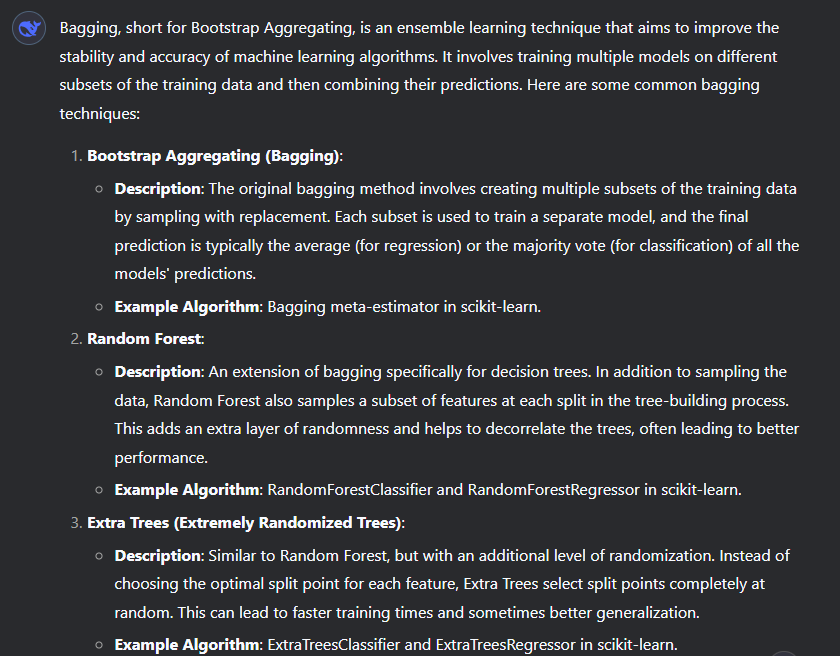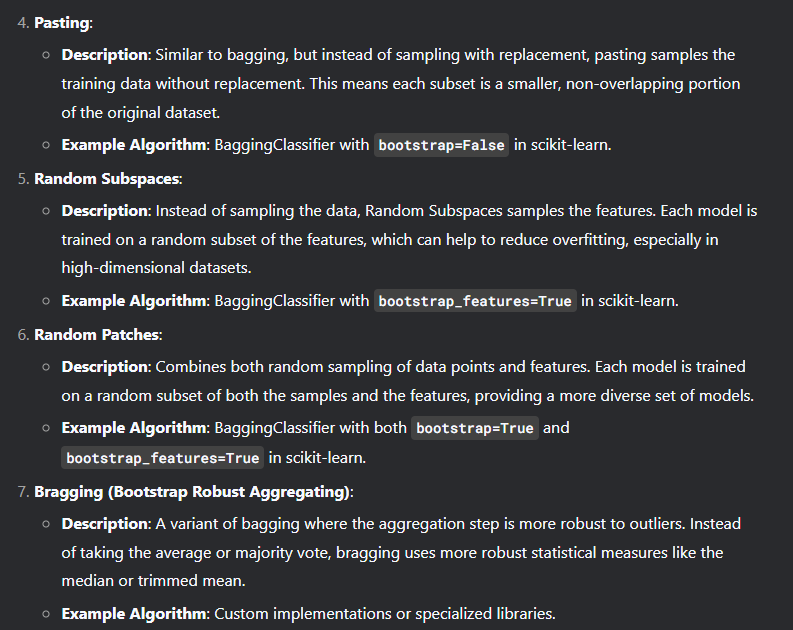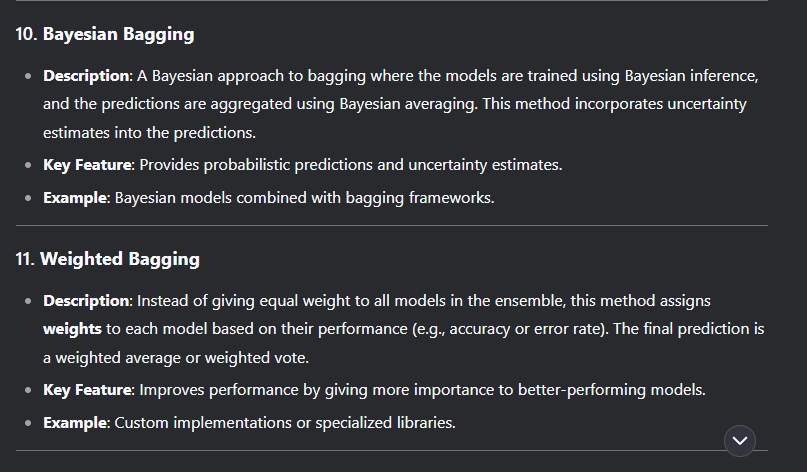

In [18]:
df = df.iloc[: , 1:]

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Encoding label

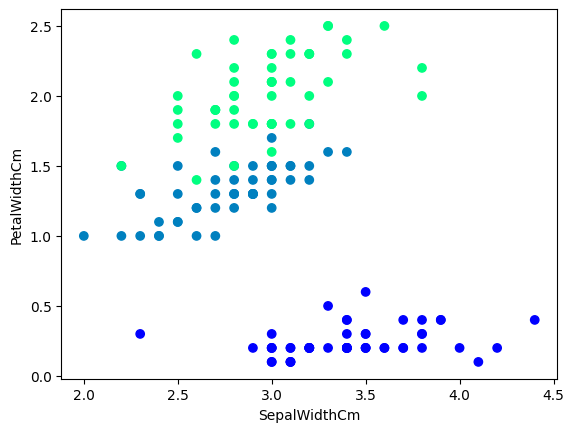

In [20]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])




plt.scatter(df['SepalWidthCm'], df['PetalWidthCm'], c=df['Species'], cmap='winter')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.show()

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Training

In [24]:
X = df.drop('Species', axis=1)
y = df['Species']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Bagging

In [34]:
from sklearn.ensemble import BaggingClassifier

In [36]:

#(Decision Tree as base estimator)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Normal Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Normal Bagging Accuracy: 1.0


# 2. Pasting

In [37]:
#(bootstrap=False)

pasting_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=False, random_state=42)
pasting_clf.fit(X_train, y_train)
y_pred_pasting = pasting_clf.predict(X_test)
print("Pasting Accuracy:", accuracy_score(y_test, y_pred_pasting))


Pasting Accuracy: 1.0


#  3. Random Subspaces

In [38]:
#(max_features < 1.0, bootstrap_features=True)

random_subspaces_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, max_features=0.5, bootstrap_features=True, random_state=42)
random_subspaces_clf.fit(X_train, y_train)
y_pred_subspaces = random_subspaces_clf.predict(X_test)
print("Random Subspaces Accuracy:", accuracy_score(y_test, y_pred_subspaces))

Random Subspaces Accuracy: 1.0


# 4. Random Patches

In [39]:
#(max_samples < 1.0, max_features < 1.0)

random_patches_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=0.8, max_features=0.8, random_state=42)
random_patches_clf.fit(X_train, y_train)
y_pred_patches = random_patches_clf.predict(X_test)
print("Random Patches Accuracy:", accuracy_score(y_test, y_pred_patches))

Random Patches Accuracy: 1.0


# 5. Bagging with SVM

In [40]:
svm_clf = SVC(probability=True, random_state=42)  # probability=True is required for predict_proba
bagging_svm_clf = BaggingClassifier(estimator=svm_clf, n_estimators=100, random_state=42)
bagging_svm_clf.fit(X_train, y_train)
y_pred_svm_bagging = bagging_svm_clf.predict(X_test)
print("Bagging with SVM Accuracy:", accuracy_score(y_test, y_pred_svm_bagging))

Bagging with SVM Accuracy: 1.0
